In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
bank = pd.read_csv('bank_note_data.csv')

In [121]:
bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


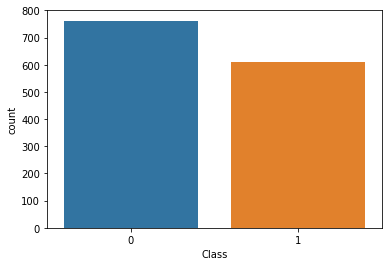

In [122]:
sns.countplot(x='Class', data=bank)

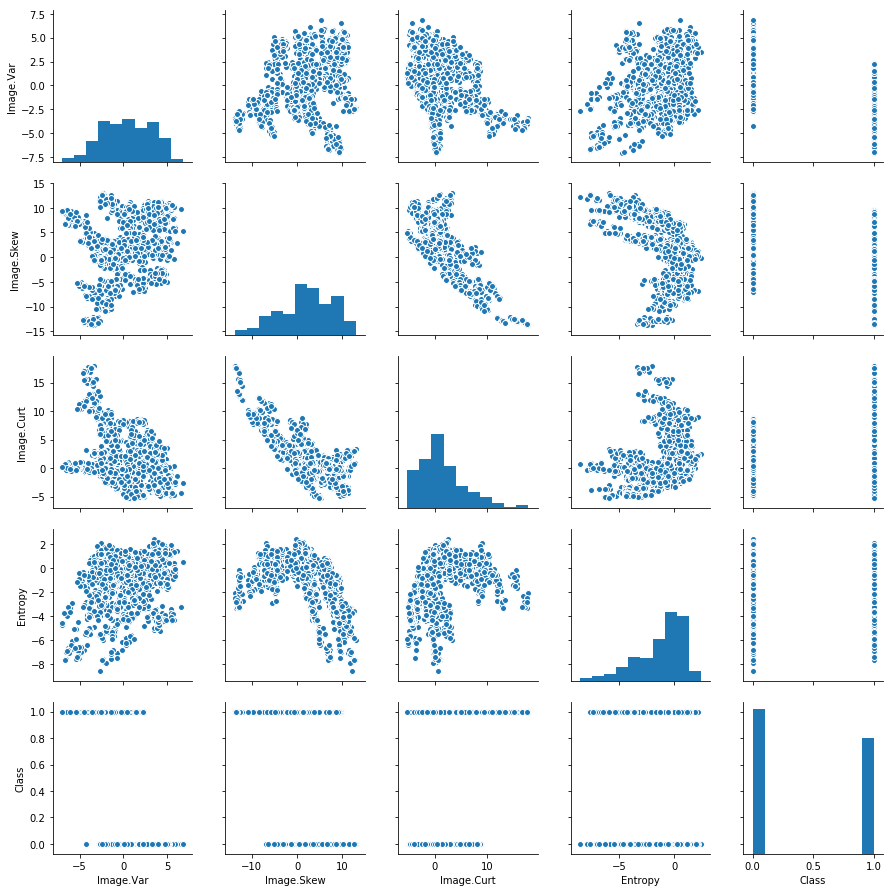

In [123]:
sns.pairplot(bank)

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()

In [126]:
scaler.fit(bank)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
bank_new = scaler.transform(bank)

In [128]:
bank_transformed = pd.DataFrame(bank_new, columns=bank.columns)

In [129]:
bank_transformed = bank_transformed.drop('Class', axis=1)

In [130]:
bank_transformed

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
5,1.384604,1.320874,-1.243653,-0.938386
6,1.111108,0.185881,-0.155217,0.836028
7,0.583612,-1.488408,1.640023,0.280680
8,0.974571,0.653913,-0.499268,0.275752
9,0.387745,1.236571,-0.851680,0.217263


In [131]:
X = bank_transformed
y = bank['Class']

In [132]:
X = X.as_matrix()

In [133]:
y = y.as_matrix()

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [135]:
import tensorflow as tf

In [136]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [138]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=2,
                                            model_dir="./output")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a355013c8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './output'}


In [139]:
classifier.fit(X_train, y_train, steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output/model.ckpt.
INFO:tensorflow:loss = 0.751589, step = 1
INFO:tensorflow:global_step/sec: 460.515
INFO:tensorflow:loss = 0.0394081, step = 101 (0.218 sec)
INFO:tensorflow:global_step/sec: 521.208
INFO:tensorflow:loss = 0.013039

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1a35501198>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a30f1cae8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [140]:
preds = classifier.predict(X_test)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-2000


In [141]:
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
predictions = list(preds)

In [146]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       218
          1       1.00      1.00      1.00       194

avg / total       1.00      1.00      1.00       412



In [147]:
print(confusion_matrix(y_test, predictions))

[[218   0]
 [  0 194]]


In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
rfc_pred = rfc.predict(X_test)

In [150]:
print(confusion_matrix(y_test,rfc_pred))

[[216   2]
 [  1 193]]


In [151]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       218
          1       0.99      0.99      0.99       194

avg / total       0.99      0.99      0.99       412

